In [1]:
import pandas as pd
fish = pd.read_csv("/content/drive/MyDrive/30619 장우준 인공지능/dataset/fish(Bream,Smelt)_2열.csv")
fish.sample(5)

,Species,Weight,Length
38,0,9.7,11.0
48,0,19.9,15.0
40,0,8.7,11.3
32,1,925.0,39.5
34,1,950.0,41.0


In [2]:
fish.shape

(49, 3)

In [3]:
pd.unique(fish["Species"])

array([1, 0])

In [4]:
# 입력 데이터 생성
import numpy as np

fish_input = fish[["Weight", "Length"]].to_numpy()
fish_input[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [5]:
# 타깃 데이터 생성
fish_target = fish["Species"].to_numpy()
fish_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

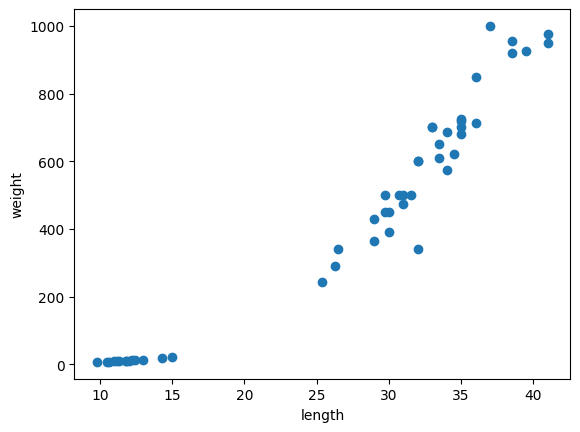

In [6]:
# 산점도 그리기: x축을 길이, y축을 무게
import matplotlib.pyplot as plt

plt.scatter(fish_input[:, 1], fish_input[:, 0])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

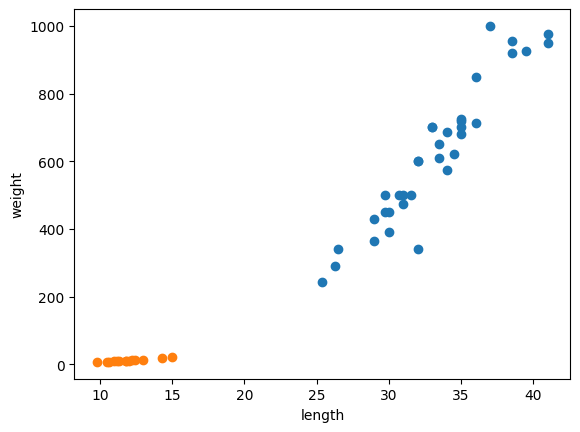

In [7]:
# 산점도 그리기: x축을 길이, y축을 무게 -> 도미랑 방어 색상 구분
import matplotlib.pyplot as plt

plt.scatter(fish_input[:35, 1], fish_input[:35, 0])
plt.scatter(fish_input[35:, 1], fish_input[35:, 0])

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### knn (K-Nearest Neighbors)

In [8]:
# knn: k 값은 디폴드 5, 반드시 홀수만 사용
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5) # k 지정 가능
kn.fit(fish_input, fish_target)
kn.score(fish_input, fish_target)

1.0

In [9]:
# 무게 600g, 길이 30cm 생선은 뭘까?
if kn.predict([[600, 30]]) == 0:
  print("빙어")
else:
  print("도미")

도미


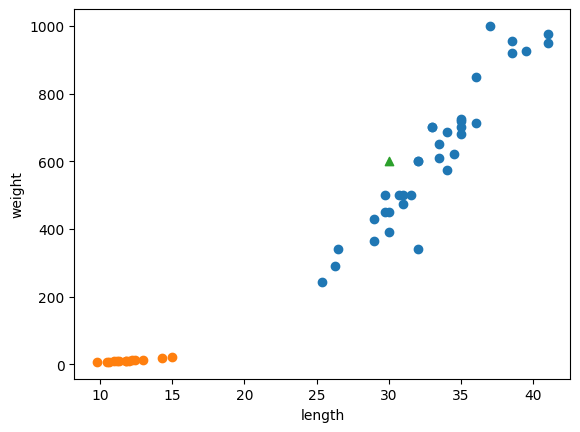

In [10]:
import matplotlib.pyplot as plt

plt.scatter(fish_input[:35, 1], fish_input[:35, 0])
plt.scatter(fish_input[35:, 1], fish_input[35:, 0])
plt.scatter(30, 600, marker="^") # 그래프 상 x/y 축 표시로 순서 다름

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

1. 가장 가까운 5개는 어디에?

In [11]:
# 거리와 인덱스 저장
distances, indexes = kn.kneighbors([[600, 30]])
print(distances, indexes)

[[ 2.          2.         10.59481005 20.5        25.3179778 ]] [[15 14 18 22 20]]


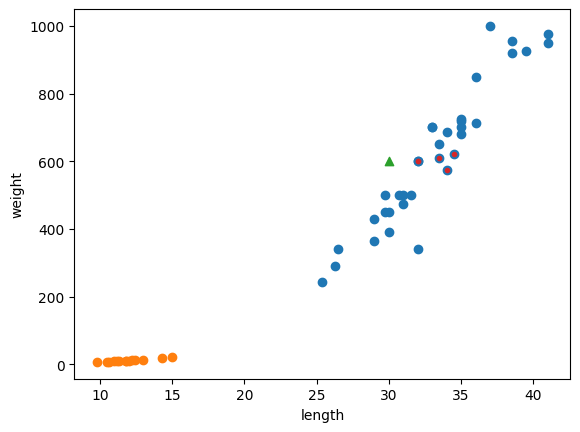

In [12]:
import matplotlib.pyplot as plt

plt.scatter(fish_input[:35, 1], fish_input[:35, 0])
plt.scatter(fish_input[35:, 1], fish_input[35:, 0])
plt.scatter(30, 600, marker="^") # 그래프 상 x/y 축 표시로 순서 다름

# 가장 가까운 5개도 표시하지
plt.scatter(fish_input[indexes, 1], fish_input[indexes, 0], marker=".")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### knn의 문제 1

In [13]:
# 가까운 거리 계산을 49로 해보자
knn49 = KNeighborsClassifier(n_neighbors=49)

In [14]:
knn49.fit(fish_input, fish_target)
knn49.score(fish_input, fish_target)

0.7142857142857143

1. 과제: Logistic Regression 모델을 사용해서 fish_input, fish_target으로 모델 생성, 학습, 정확도, 예측 해봅시다

In [15]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(fish_input, fish_target)

logistic.score(fish_input, fish_target)

1.0

In [16]:
if logistic.predict([[100, 30]]) == 0:
  print("빙어")
else:
  print("도미")

빙어


### 데이터 전처리 (학습 데이터, 테스트 데이터 나누기)

1. 수동으로 하는 법
2. 사이킷런을 사용하는 법

In [17]:
# train test split
from sklearn.model_selection import train_test_split

In [18]:
# random state를 통해 결과를 같게 만들 수 있음
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [19]:
test_target

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
# 샘플링 편향: 너무 한 그룹으로 훈련 데이터가 편향 되는 것
# 해결하기 위해서는 stratify 매개변수에 담긴 데이터 전달: 클래스 비율에 맞게 데이터를 나눔
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42, stratify=fish_target)
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [21]:
test_target

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [22]:
# test size 조절: 디폴트 75:25 -> test_size: 0~1 비율
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42, stratify=fish_target, test_size=0.3)
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(34, 2) (15, 2)
(34,) (15,)


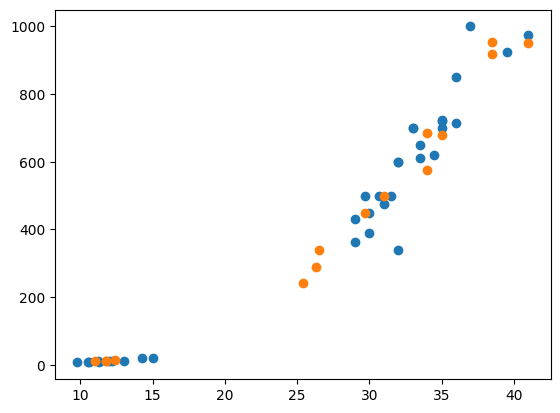

In [23]:
# 산점도 그리기: 파란색이 학습 데이터, 주황색이 테스트 데이터
plt.scatter(train_input[:, 1], train_input[:, 0])
plt.scatter(test_input[:, 1], test_input[:, 0])

In [24]:
# 학습 데이터로 학습, 처음 보는 테스트 데이터로 정확도 확인
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [25]:
logistic.fit(train_input, train_target)
logistic.score(test_input, test_target)

1.0

In [26]:
for i in range(3, 10):
  if i == 3 or i == 7 or i == 9:
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(train_input, train_target)
    print(f"knn k={i}일 때 점수 확인 {kn.score(test_input, test_target)}")

knn k=3일 때 점수 확인 1.0
knn k=7일 때 점수 확인 1.0
knn k=9일 때 점수 확인 1.0


In [27]:
# 처음 7개 테스트 데이터의 예측값
logistic.predict(train_input[:7])

array([0, 1, 1, 1, 1, 1, 0])

In [28]:
# 예측 확률을 보자
np.set_printoptions(precision=6, suppress=True) # 지수 표현을 바꾸는 방법
logistic.predict_proba(train_input[:7])

array([[0.999982, 0.000018],
       [0.      , 1.      ],
       [0.      , 1.      ],
       [0.      , 1.      ],
       [0.      , 1.      ],
       [0.      , 1.      ],
       [0.999985, 0.000015]])

In [29]:
# 학습 계수를 알아보자
print(logistic.coef_, logistic.intercept_)

[[0.060212 0.003408]] [-11.69133]


In [31]:
# 표준 조수 z 값을 출력
descision = logistic.decision_function(train_input[:7])
descision

array([-10.915168,  24.544838,  25.757595,  18.519222,  24.544838,
        31.780484, -11.128976])

In [32]:
# z 값을 시그모이드 함수를 통해서 확륙을 계산
# 사이파이 라이브러리에 시그모이드 함수 사용
from scipy.special import expit
expit(descision)

array([0.000018, 1.      , 1.      , 1.      , 1.      , 1.      ,
       0.000015])

## knn의 문제 2: 거리 계산의 오차

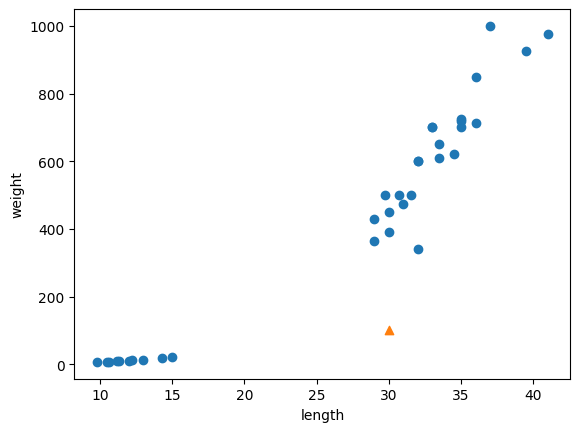

In [35]:
# 수상한 도미, 산점도 그리고 if문 사용
plt.scatter(train_input[:, 1], train_input[:, 0])
plt.scatter(30, 100, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [39]:
if kn.predict([[100, 30]]) == 0:
  print("빙어")
else:
  print("도미")

빙어


1. 가장 가까운 5개는 도대체 어디에

In [40]:
distances, indexes = kn.kneighbors([[100, 30]])
print(distances, indexes)

[[81.492392 81.820413 89.430644 89.58616  91.978476 92.138374 93.195386
  94.533063 95.001895]] [[29 16 26  0 11  9  6 21 23]]


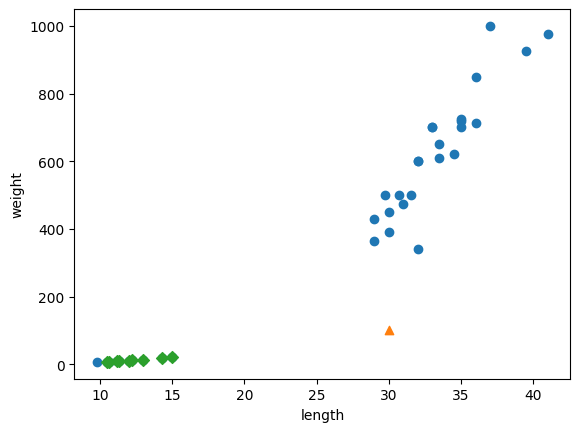

In [44]:
# 그대로 복사
plt.scatter(train_input[:, 1], train_input[:, 0])
plt.scatter(30, 100, marker="^")
# 이것만 추가
plt.scatter(train_input[indexes, 1], train_input[indexes, 0], marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

## 기준을 맞춰라: 정규화, 표준화 -> 스케일링

1. 둘다 사이킷런에서 제공
2. 이번에만 표준화를 수동으로

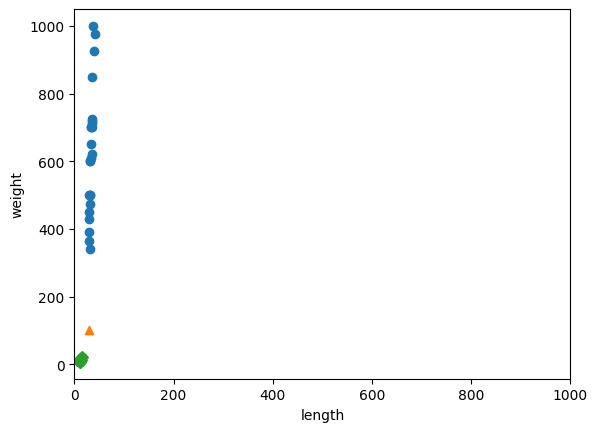

In [46]:
# x축 범위를 y축 범위와 동일하게 변경
# 그대로 복사
plt.scatter(train_input[:, 1], train_input[:, 0])
plt.scatter(30, 100, marker="^")
plt.scatter(train_input[indexes, 1], train_input[indexes, 0], marker="D")
plt.xlim(0, 1000)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [47]:
# 평균, 표준편차 출력
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[445.602941  27.023529] [319.211221  10.08161 ]


In [48]:
# 표준 점수 계산 (자동으로 브로드 캐스팅이 된다)
train_scaled = (train_input - mean) / std
train_scaled

array([[-1.357731, -1.470353],
       [ 0.483683,  0.493619],
       [ 0.546337,  0.741595],
       [ 0.170411,  0.364671],
       [ 0.483683,  0.493619],
       [ 0.85961 ,  0.79119 ],
       [-1.368695, -1.559625],
       [ 0.840813,  0.890381],
       [-0.04888 ,  0.196047],
       [-1.365249, -1.569544],
       [ 0.170411,  0.26548 ],
       [-1.365249, -1.490192],
       [ 0.092093,  0.394428],
       [ 1.736772,  0.989571],
       [-0.258772,  0.196047],
       [ 0.796955,  0.592809],
       [-1.334235, -1.262053],
       [ 0.170411,  0.444023],
       [ 1.501818,  1.237547],
       [-1.374961, -1.708411],
       [ 1.266864,  0.890381],
       [-1.372455, -1.638977],
       [ 0.51501 ,  0.642404],
       [-1.374021, -1.629058],
       [ 0.796955,  0.79119 ],
       [ 0.875273,  0.79119 ],
       [-1.357731, -1.391001],
       [ 0.013775,  0.295238],
       [ 0.796955,  0.592809],
       [-1.333609, -1.19262 ],
       [-0.330825,  0.493619],
       [ 0.640319,  0.642404],
       [

In [51]:
# scale 처리한 훈련 세트로 다시 학습
knn2 = KNeighborsClassifier()
knn2.fit(train_scaled, train_target)

KNeighborsClassifier()

In [54]:
# 과제: 테스트 데이터도 똑같이 표준 점수로 계산해보고, 정확도 계산
# 수상한 도미도 스케일링 필요

test_scaled = (test_input - mean) / std
knn2.score(test_scaled, test_target)

1.0

In [56]:
new = ([100, 30] - mean) / std

if knn2.predict([new]) == 0:
  print("빙어")
else:
  print("도미")

도미


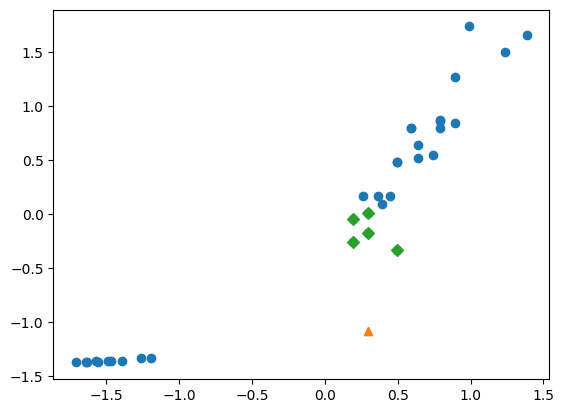

In [57]:
# 스케일한 데이터로 산점도 그리기
distances, indexes = knn2.kneighbors([new])
plt.scatter(train_scaled[:, 1], train_scaled[:, 0])
plt.scatter(new[1], new[0], marker="^")
plt.scatter(train_scaled[indexes, 1], train_scaled[indexes, 0], marker="D")